# Q9. Performance Evaluation Programming


In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

In [32]:
iris_dataset = load_iris()
x = iris_dataset.data
y = iris_dataset.target

In [33]:
# Spliting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=62
    
)

In [34]:
#KNN classifier
knn = KNeighborsClassifier(n_neighbors=5) # Initializing kNN classifier with k=5
knn.fit(x_train, y_train)


y_pred = knn.predict(x_test)
y_pred

array([2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       2, 1, 2, 0, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       2])

In [35]:
# Confusion matrix
matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(matrix)


Confusion Matrix:
[[15  0  0]
 [ 0 11  1]
 [ 0  1 17]]


In [36]:
# using classification_report for accuracy, precision, recall, F1
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris_dataset.target_names))

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.92      0.92      0.92        12
   virginica       0.94      0.94      0.94        18

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



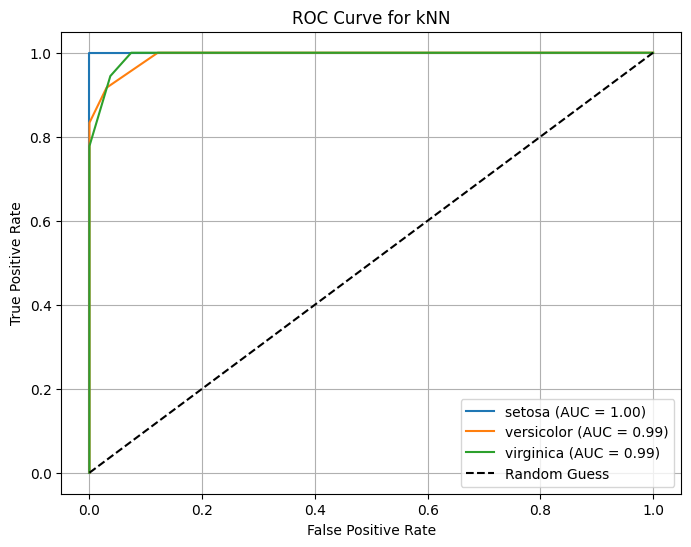

In [37]:
# ROC curve and AUC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score = knn.predict_proba(x_test)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(iris_dataset.target_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for kNN')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()